In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance_data.csv')

In [ ]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


### Types:-
- numerical = patientid, age, bmi, bloodpressure, claim
- categorical = gender, diabetic, children, smoker, region

### Univar analysis of numerical columns:-

In [ ]:
df['age'].describe()

,age
count,1335.000000
mean,38.078652
std,11.102924
min,18.000000
25%,29.000000
50%,38.000000
75%,47.000000
max,60.000000


<Axes: ylabel='Density'>

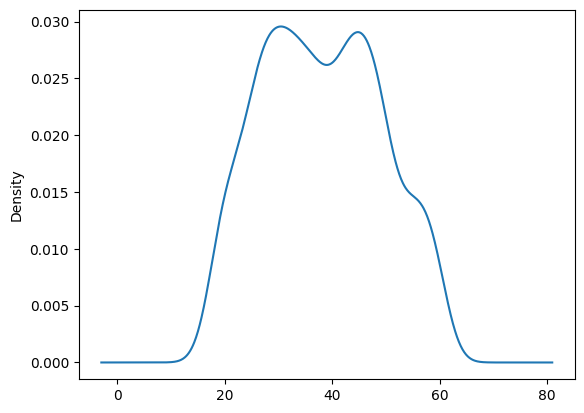

In [ ]:
df['age'].plot(kind='kde')

<Axes: >

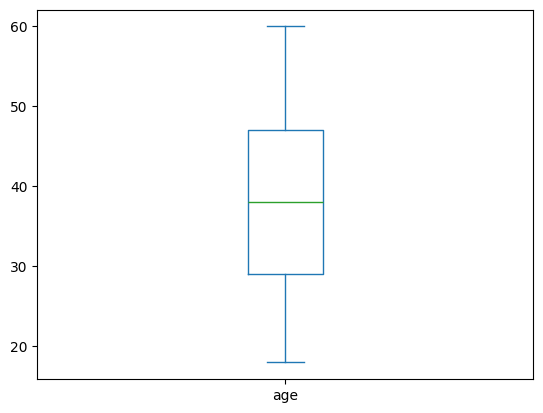

In [ ]:
df['age'].plot(kind='box')

In [ ]:
df['age'].skew()

np.float64(0.11361133741072633)

In [ ]:
df['age'].isnull().sum()

np.int64(5)

In [ ]:
'''
conclusion:-
- 0 outliers
- normal
- 5 missing values
'''

In [ ]:
df['bmi'].describe()


,bmi
count,1340.000000
mean,30.668955
std,6.106735
min,16.000000
25%,26.275000
50%,30.400000
75%,34.700000
max,53.100000


<Axes: ylabel='Density'>

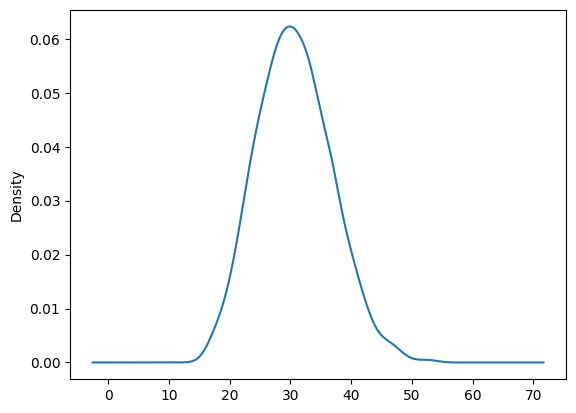

In [ ]:
df['bmi'].plot(kind='kde')


<Axes: >

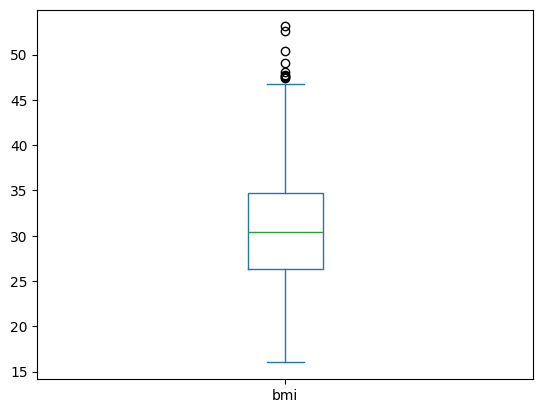

In [ ]:
df['bmi'].plot(kind='box')

'''
what to do when outliers detected in case of box plot?
if outliers are:-
1. Possible + rare ⇒ keep (but scale or transform). for eg: bmi of 53 is possible but quite rare. if a person is an adult, bmi of 53 means
extreme obesity but still it is medically possible.

2. Impossible / entry error ⇒ drop or mark missing. for eg:- bmi of 53 for person of age 3 where 53 is valid but logic is invalid, not
possible. say, if person adult but bmi of 300 recorded, this is entry error.

'''

In [ ]:
df[df['bmi']>47]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
579,579,580,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,675,676,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
696,696,697,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,802,803,42.0,male,49.1,109,Yes,0,No,southeast,11381.33
1299,1299,1300,50.0,male,52.6,110,No,1,Yes,southeast,44501.40
1306,1306,1307,43.0,female,47.6,112,Yes,2,Yes,southwest,46113.51
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [ ]:
df['bmi'].skew()

np.float64(0.28597245020808587)

In [ ]:
df['bmi'].isnull().sum()

np.int64(0)

In [ ]:
'''
conclusion:-
- few outliers
- 0 missing values
- normal dist
'''

In [ ]:
df['bloodpressure'].describe()


,bloodpressure
count,1340.000000
mean,94.157463
std,11.434712
min,80.000000
25%,86.000000
50%,92.000000
75%,99.000000
max,140.000000


<Axes: ylabel='Density'>

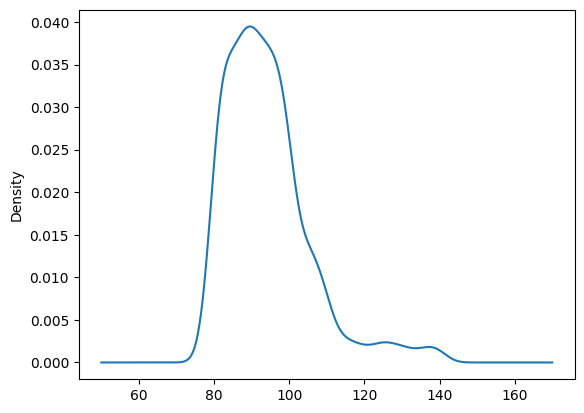

In [ ]:
df['bloodpressure'].plot(kind='kde')


<Axes: >

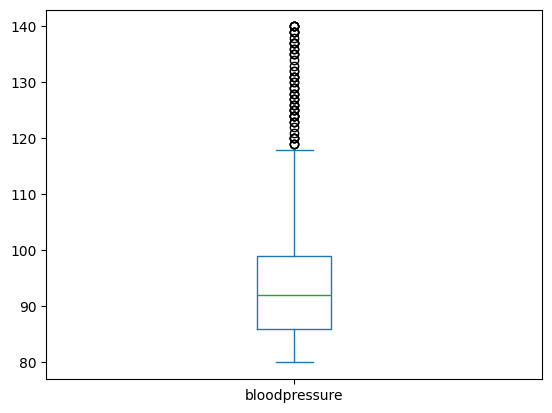

In [ ]:
df['bloodpressure'].plot(kind='box')


In [ ]:
Q1 = df['bloodpressure'].quantile(0.25)
Q3 = df['bloodpressure'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR #max value of the box plot
df[df['bloodpressure']>upper_bound]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1147,1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95
1150,1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36
1152,1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26
1153,1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10
1154,1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51
...,...,...,...,...,...,...,...,...,...,...,...
1325,1325,1326,52.0,female,36.4,133,Yes,1,Yes,northeast,48517.56
1332,1332,1333,26.0,male,37.0,120,No,2,Yes,southeast,49577.66
1333,1333,1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1334,1334,1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83


In [ ]:
df['bloodpressure'].skew()

np.float64(1.4835342102293079)

In [ ]:
df['bloodpressure'].isnull().sum()

np.int64(0)

In [ ]:
'''
conclusion:-
- has many outliers
- 0 missing values
- right skewed
'''

In [ ]:
df['claim'].describe()

,claim
count,1340.000000
mean,13252.745642
std,12109.609288
min,1121.870000
25%,4719.685000
50%,9369.615000
75%,16604.305000
max,63770.430000


<Axes: ylabel='Density'>

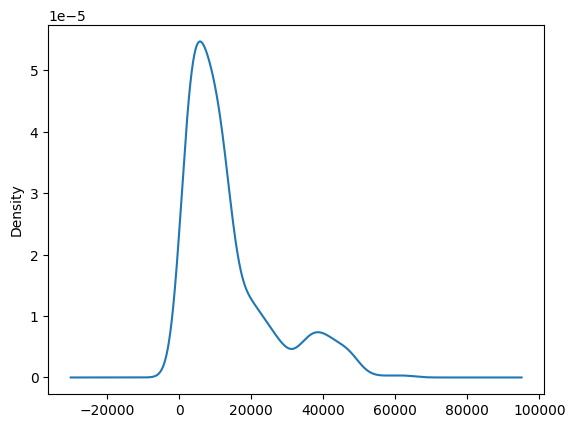

In [ ]:
df['claim'].plot(kind='kde')


<Axes: >

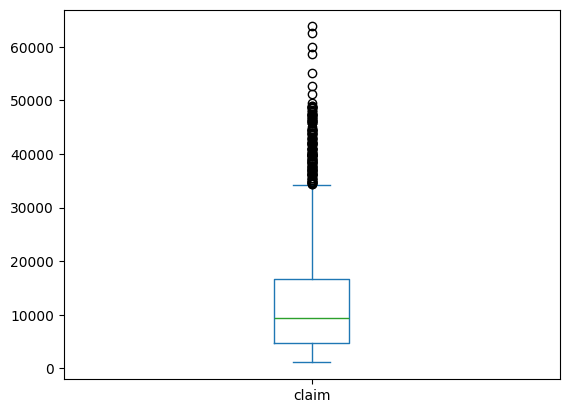

In [ ]:
df['claim'].plot(kind='box')


In [ ]:
Q1 = df['claim'].quantile(0.25)
Q3 = df['claim'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR #max value of the box plot
df[df['claim']>upper_bound]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1199,1199,1200,30.0,female,33.1,93,Yes,0,Yes,southeast,34439.86
1200,1200,1201,40.0,male,32.7,98,No,0,Yes,southwest,34472.84
1201,1201,1202,45.0,male,33.5,81,No,0,Yes,northeast,34617.84
1202,1202,1203,32.0,male,31.7,125,No,0,Yes,southeast,34672.15
1203,1203,1204,26.0,male,34.8,94,Yes,0,Yes,southwest,34779.62
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [ ]:
df['claim'].skew()

np.float64(1.5167468509489237)

In [ ]:
df['claim'].isnull().sum()

np.int64(0)

In [ ]:
'''
conclusions:-
- has many outliers
- 0 missing values
- right skewed
'''

### Univar analysis of categorical columns:-

In [ ]:
df['gender'].value_counts()

,count
gender,
male,678
female,662


In [ ]:
df['gender'].isnull().sum()

np.int64(0)

In [ ]:
df['gender'].unique()

'''
as categorical column is text too, we need to see if there are any typos or inconsistencies.
'''

array(['male', 'female'], dtype=object)

In [ ]:
'''
conclusion:-
- feature balanced (almost equal males and females not causing any biases)
- no missing values
- no typos or inconsistencies
'''

In [ ]:
df['diabetic'].value_counts()

,count
diabetic,
No,698
Yes,642


In [ ]:
df['diabetic'].isnull().sum()

np.int64(0)

In [ ]:
df['diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
'''
conclusion:-
- feature balanced
- no missing values
- no typos or inconsistencies
'''

In [ ]:
df['smoker'].value_counts()


,count
smoker,
No,1066
Yes,274


In [ ]:
df['smoker'].isnull().sum()

np.int64(0)

In [ ]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
'''
conclusion:-
- feature imbalanced (too many non smokers)
- no missing values
- no typos or inconsistencies
'''

In [ ]:
df['region'].value_counts()


,count
region,
southeast,443
northwest,349
southwest,314
northeast,231


<Axes: ylabel='count'>

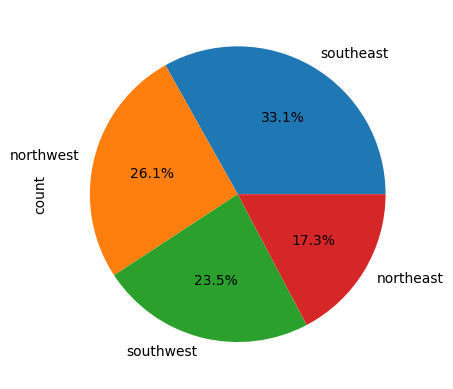

In [ ]:
df['region'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['region'].isnull().sum()

np.int64(3)

In [ ]:
df['region'].unique()

array(['southeast', 'northwest', nan, 'southwest', 'northeast'],
      dtype=object)

In [ ]:
'''
conclusion:-
- feature almost balanced
- 3 missing values
- no typos or inconsistencies
'''

In [ ]:
df['children'].value_counts()


,count
children,
0,576
1,324
2,240
3,157
4,25
5,18


<Axes: ylabel='count'>

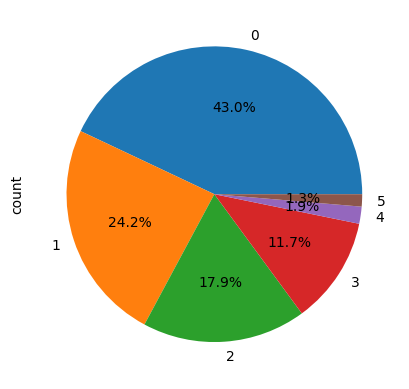

In [ ]:
df['children'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['region'].isnull().sum()

np.int64(3)

In [ ]:
df['children'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
'''
conclusion:-
- features highly imbalanced. most with 0 children and least with 5 children.
- 3 missing values
- no typos or inconsistencies
'''

### Bivar analysis (target column = diabetic)

In [ ]:
# cat - cat
pd.crosstab(df['diabetic'],df['gender'])

gender,female,male
diabetic,,
No,339,359
Yes,323,319


In [ ]:
pd.crosstab(df['diabetic'],df['gender'], normalize = 'columns')
'''
similar chances of being diabetic for both genders
'''

gender,female,male
diabetic,,
No,0.512085,0.529499
Yes,0.487915,0.470501


In [ ]:
pd.crosstab(df['diabetic'],df['smoker'], normalize = 'columns')
'''
smoking has little to no effect on person getting diabetes
'''

smoker,No,Yes
diabetic,,
No,0.525328,0.50365
Yes,0.474672,0.49635


In [ ]:
pd.crosstab(df['diabetic'],df['children'], normalize = 'columns')
'''
no considerable effect
'''

children,0,1,2,3,4,5
diabetic,,,,,,
No,0.506944,0.552469,0.5,0.528662,0.52,0.611111
Yes,0.493056,0.447531,0.5,0.471338,0.48,0.388889


In [ ]:
pd.crosstab(df['diabetic'],df['region'], normalize = 'columns')

region,northeast,northwest,southeast,southwest
diabetic,,,,
No,0.47619,0.550143,0.507901,0.541401
Yes,0.52381,0.449857,0.492099,0.458599


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


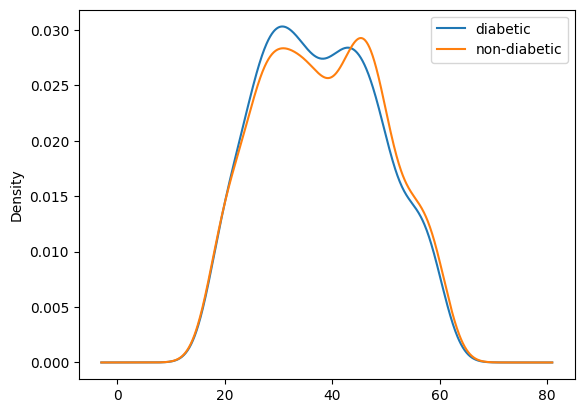

'\n\n'

In [ ]:
# CAT - NUM
import matplotlib.pyplot as plt
df[df['diabetic'] == 'Yes']['age'].plot(kind='kde',label='diabetic')
df[df['diabetic'] == 'No']['age'].plot(kind='kde',label='non-diabetic')

plt.legend()
plt.show()

'''
at smaller age, more chances of diabetes. at higher age, less chances of diabetes.
'''

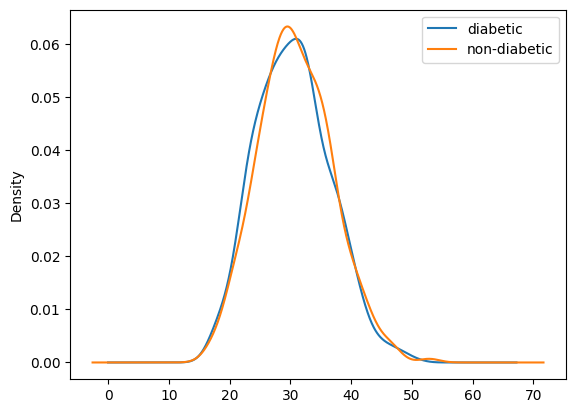

In [ ]:
df[df['diabetic'] == 'Yes']['bmi'].plot(kind='kde',label='diabetic')
df[df['diabetic'] == 'No']['bmi'].plot(kind='kde',label='non-diabetic')

plt.legend()
plt.show()

'''
at lower bmi, more chances of diabetes. at higher bmi, less chances of diabetes.
'''

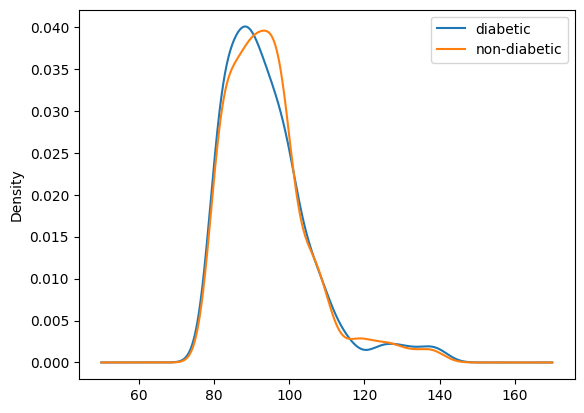

In [3]:
df[df['diabetic'] == 'Yes']['bloodpressure'].plot(kind='kde',label='diabetic')
df[df['diabetic'] == 'No']['bloodpressure'].plot(kind='kde',label='non-diabetic')

plt.legend()
plt.show()

'''
if you see at the tail end, diabetics are having slightly more blood pressure than non diabetics, which is biologically true.
'''

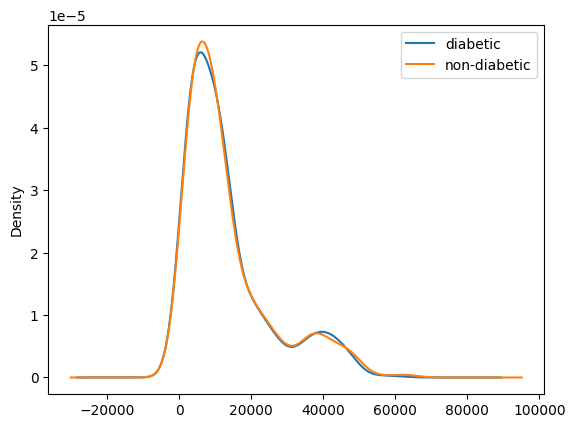

In [4]:
df[df['diabetic'] == 'Yes']['claim'].plot(kind='kde',label='diabetic')
df[df['diabetic'] == 'No']['claim'].plot(kind='kde',label='non-diabetic')

plt.legend()
plt.show()